In [1]:
import pysm
from pysm.nominal import models

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline

I am setting the sky to have the same settings as in the tutorial.

In [10]:
nside = 64 
sky_config = {
    'synchrotron' : models('s1', nside), 
    'dust' : models('d1', nside), 
    'freefree' : models('f1', nside), 
    'cmb' : models('c1', nside), 
    'ame' : models('a1', nside)
}
sky = pysm.Sky(sky_config)
#You have to run this code again before the first graph

Here, I am setting the pixels I want to observe

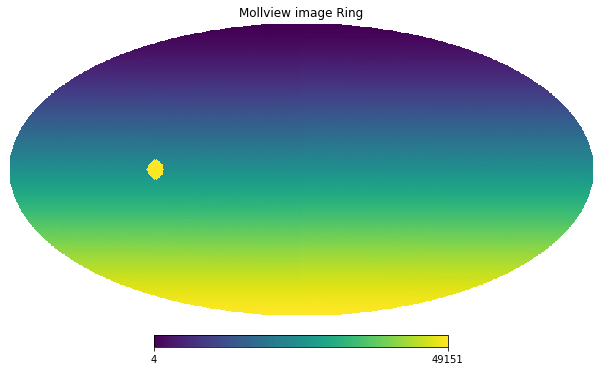

In [3]:
npix = hp.nside2npix(nside)
vec = hp.ang2vec(np.pi / 2, np.pi / 2)
ipix_disc = hp.query_disc(nside = 64, vec = vec, radius = np.radians(5))
m = np.arange(npix)
m[ipix_disc] = m.max()
hp.mollview(m, title = 'Mollview image Ring')

In [4]:
sky = pysm.Sky(sky_config) 

total = sky.signal()(100.)

fig = plt.figure(figsize = (13, 8))

<Figure size 936x576 with 0 Axes>

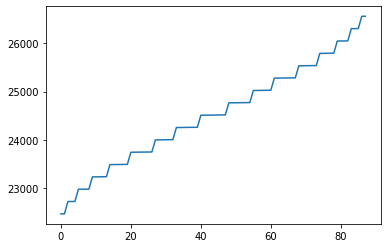

In [5]:
plt.plot(ipix_disc)

In [6]:
d5_config = models("d5", nside)
s3_config = models("s3", nside)
sky_config = {'dust' : d5_config, 'synchrotron' : s3_config}
sky = pysm.Sky(sky_config)

brightness = []

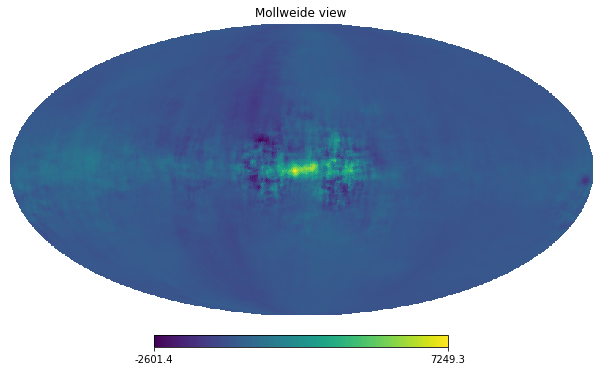

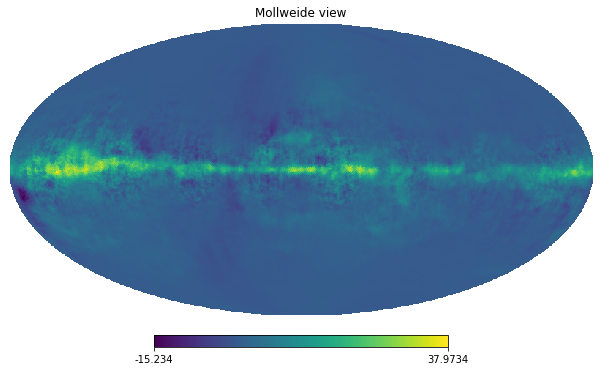

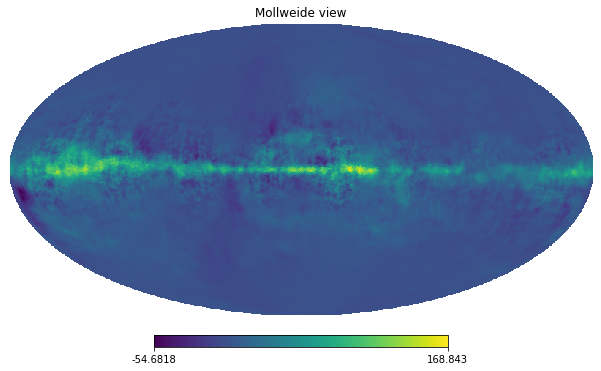

In [7]:
nu = np.array([10, 100, 500])
total_signal = sky.signal()(nu)
dust_signal = sky.dust(nu)
synchrotron_signal = sky.synchrotron(nu)

for i in range(3): #mapping the sky at specific frequencies. I wasn't 100% sure where to put the i.
    hp.mollview(total_signal[i, 1, :])
    brightness.append((total_signal[i, 1, ipix_disc]))

In [8]:
print(brightness)

[array([ 736.25510968,  409.88018212,  822.75613573,  629.30729844,
        497.54669019,  838.94349869,  898.64916533,  462.79684597,
        596.74164133,  920.55180343,  787.66659954,  661.45077681,
        555.43532704,  713.00266939,  914.41610482,  867.05207954,
        757.24120623,  464.09470417,  600.52952307,  750.94327794,
       1057.13384788, 1038.78373962,  748.43260755,  546.47165341,
        331.70957672,  668.46673298,  795.65214909, 1025.24323446,
        700.98371147,  515.70515281,  430.00230501,  500.059811  ,
        830.72651896,  945.87596042,  732.6842355 ,  488.6647414 ,
        483.2380825 ,  480.06397406,  798.48425644,  936.20172151,
        814.09553519,  835.84460062,  546.54254959,  476.56724615,
        490.18691428,  646.73098895,  885.68642324,  927.31528095,
        762.98620439,  592.20887161,  451.12407421,  446.10045023,
        544.20026858,  873.70794781,  957.28047086,  593.03281969,
        444.33420184,  309.16099503,  408.68579262,  545.0974

In [11]:
cmb = sky.cmb(nu = 23.)
ipix_disc = hp.query_disc(nside = 64, vec = vec, radius = np.radians(5))
m = np.arange(npix)
m[ipix_disc] = m.max()
#freqs = np.logspace(start = 284.28972722971764, stop = 1057.1338478776038, num = 88)
output = sky.signal()(brightness[0])
total_fgnd = np.std(output - sky.cmb(brightness[0]), axis = 2)

First, I plotted them one at a time manually:

Text(0.5, 1.0, 'Hopefully pixel brightness vs frequency')

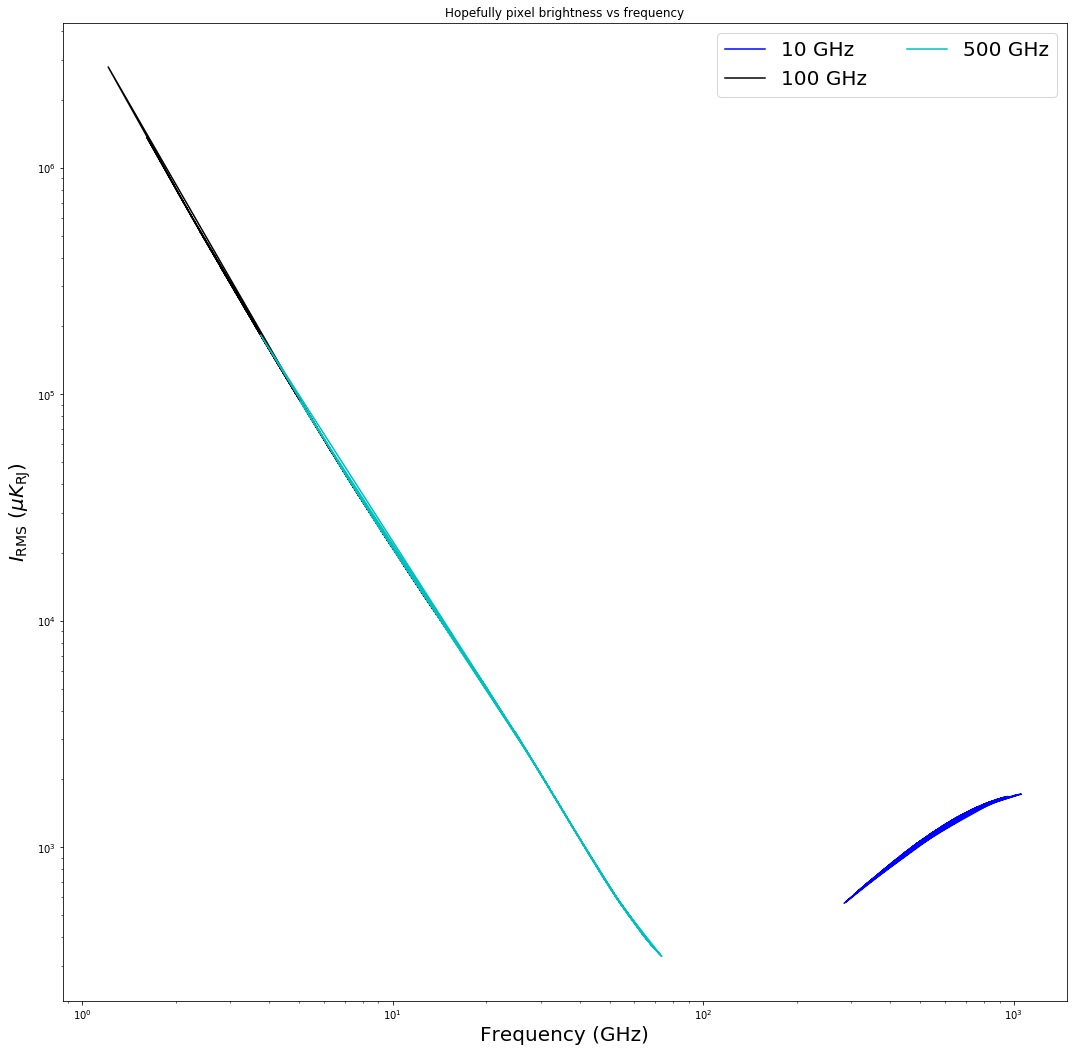

In [12]:
plt.figure(figsize = (18, 18))
output = sky.signal()(brightness[0])
total_fgnd = np.std(output - sky.cmb(brightness[0]), axis = 2)
plt.loglog(brightness[0], total_fgnd[:, 0], label = "10 GHz", color = 'b')
output = sky.signal()(brightness[1])
total_fgnd = np.std(output - sky.cmb(brightness[1]), axis = 2)
plt.loglog(brightness[1], total_fgnd[:, 0], label = '100 GHz', color = 'k')
output = sky.signal()(brightness[2])
total_fgnd = np.std(output - sky.cmb(brightness[2]), axis = 2)
plt.loglog(brightness[2], total_fgnd[:, 0], label = '500 GHz', color = 'c')
plt.xlabel('Frequency (GHz)', fontsize = 20)
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)", fontsize = 20)
#plt.axis([0, 1058, 500, 2000])
plt.legend(fontsize = 20, ncol = 2)
plt.title('Hopefully pixel brightness vs frequency')

And then I ran it as a loop, but now it doesn't have a legend:

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Hopefully pixel brightness vs frequency')

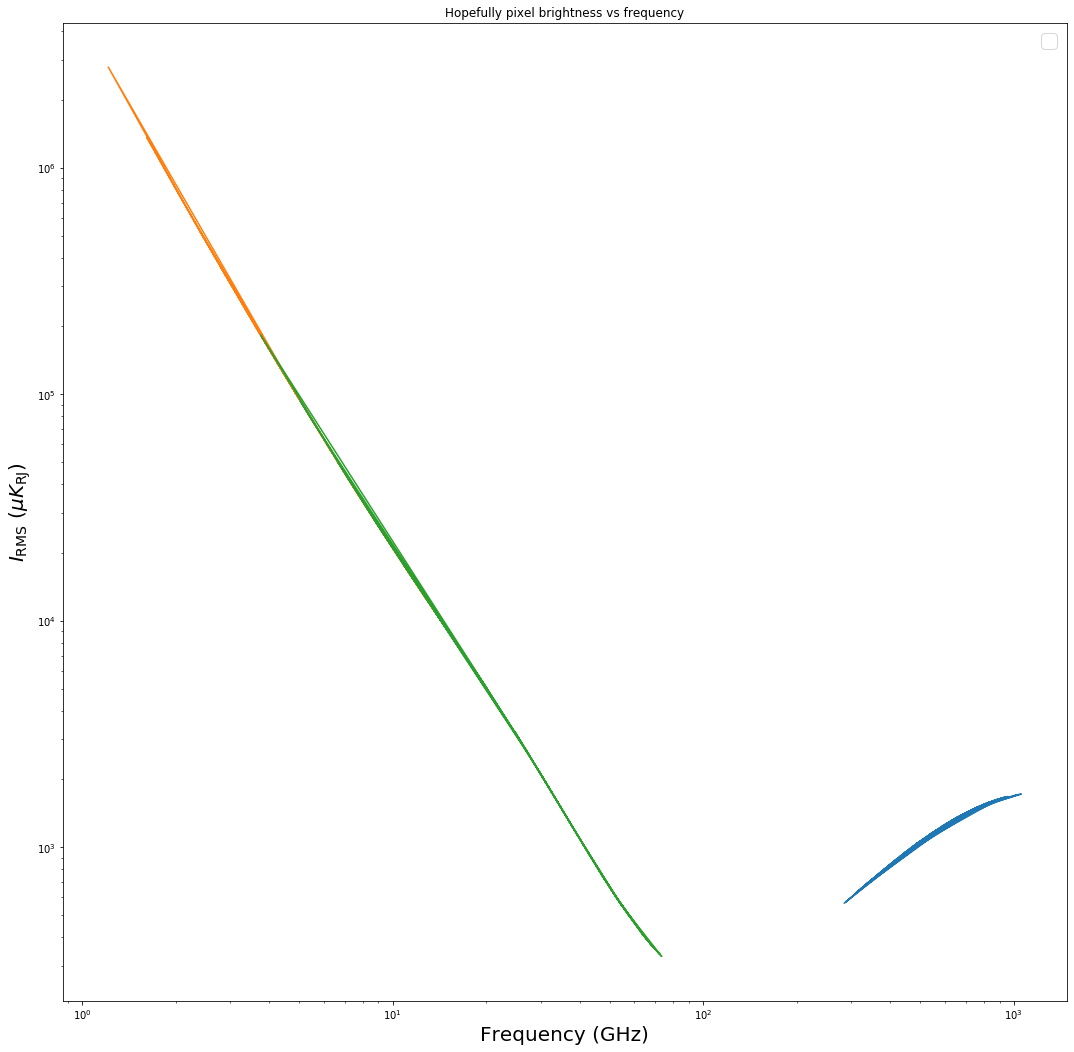

In [13]:
plt.figure(figsize = (18, 18))

for i in range(3):
    output = sky.signal()(brightness[i])
    total_fgnd = np.std(output - sky.cmb(brightness[i]), axis = 2)
    plt.loglog(brightness[i], total_fgnd[:, 0])

plt.xlabel('Frequency (GHz)', fontsize = 20)
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)", fontsize = 20)
#plt.axis([0, 1058, 500, 2000])
plt.legend(fontsize = 20, ncol = 2)
plt.title('Hopefully pixel brightness vs frequency')

Now, I found and plotted the brightness vs frequency for the average of the three frequencies of the sky.

In [14]:
new_brightness = (brightness[0] + brightness[1] + brightness[2]) / 3

Text(0, 0.5, '$I_{\\rm RMS}$ ($\\mu K_{\\rm RJ}$)')

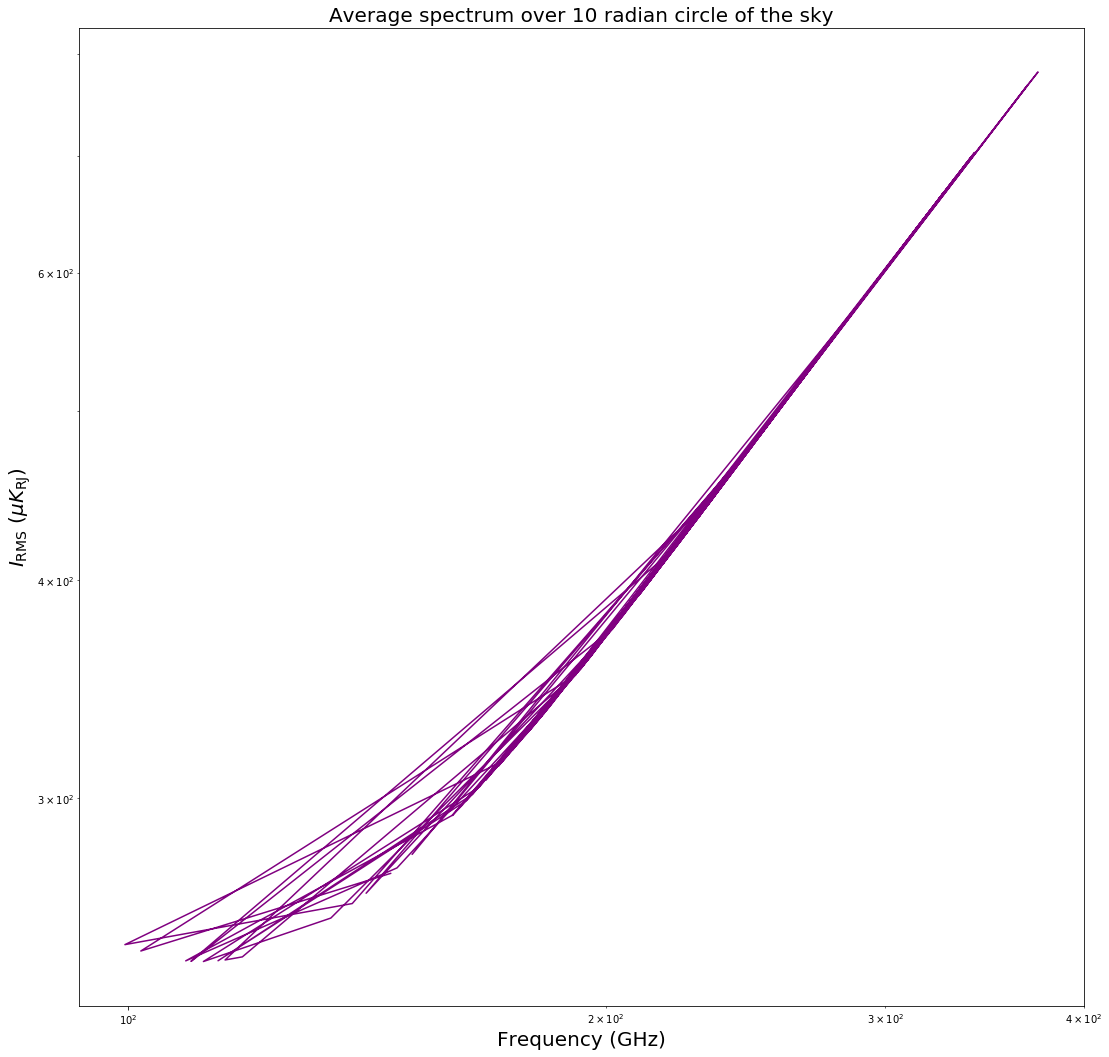

In [15]:
plt.figure(figsize = (18, 18))
output = sky.signal()(new_brightness)
total_fgnd = np.std(output - sky.cmb(new_brightness), axis = 2)
plt.loglog(new_brightness, total_fgnd[:, 0], label = "10 GHz", color = 'purple')
plt.title("Average spectrum over 10 radian circle of the sky", fontsize = 20)
plt.xlabel('Frequency (GHz)', fontsize = 20)
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)", fontsize = 20)